# Analysis of NFL play choice

## import desired packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# read in data and take a look at the dataset

In [3]:
df = pd.read_csv("NFL Play by Play 2009-2018 (v5).csv")

C:\Users\pspat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.describe()

,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,lateral_sack_player_id,lateral_sack_player_name,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackle_4_team,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
count,449371.000000,4.493710e+05,436301.000000,449230.000000,449206.000000,449208.000000,449371.000000,449371.000000,449371.000000,449371.000000,381409.000000,436664.000000,449371.000000,449371.000000,449158.000000,449371.000000,449371.000000,436497.000000,449371.000000,449371.000000,449371.000000,175719.000000,108907.000000,50740.000000,449371.000000,449371.000000,436497.000000,436492.000000,436492.000000,449371.000000,449371.000000,433952.000000,433952.000000,433952.000000,436492.000000,436492.000000,436492.000000,448693.000000,448693.000000,448693.000000,448693.000000,448693.000000,448693.000000,448693.000000,449371.000000,449371.000000,435812.000000,433535.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,174082.000000,173699.000000,436299.000000,436111.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,433313.000000,4.333130e+05,435388.000000,435388.000000,444050.000000,433334.000000,433334.000000,449371.000000,449371.000000,449371.000000,449371.000000,173940.000000,173724.000000,436156.000000,436064.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,449371.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.000000,436497.0

# filter to non-special teams related plays or timeouts

In [7]:
df=df.loc[(df['play_type'] == 'pass')|(df['play_type'] == 'run')]

In [12]:
df=df.loc[df["two_point_attempt"] == 0] 

In [13]:
df=df.loc[df["timeout"] == 0] 

In [14]:
df=df.loc[df["extra_point_attempt"] == 0] 

In [16]:
df=df.loc[df["ydstogo"] > 0] 

# Begin dropping columns that are not relevant to analysis

In [22]:
cols = df.columns.tolist()
cols

['play_id',
 'game_id',
 'home_team',
 'away_team',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'posteam_score_post',
 'defteam_score_post',
 'score_differential_post',
 'no_sc

In [21]:
df.drop(columns = [ 'extra_point_attempt',
 'two_point_attempt',
 'field_goal_attempt',
 'kickoff_attempt',
 'punt_attempt',
 'fumble',
 'complete_pass',
 'assist_tackle',
 'lateral_reception',
 'lateral_rush',
 'lateral_return',
 'lateral_recovery',
 'passer_player_id',
 'passer_player_name',
 'receiver_player_id',
 'receiver_player_name',
 'rusher_player_id',
 'rusher_player_name',
 'lateral_receiver_player_id',
 'lateral_receiver_player_name',
 'lateral_rusher_player_id',
 'lateral_rusher_player_name',
 'lateral_sack_player_id',
 'lateral_sack_player_name',
 'interception_player_id',
 'interception_player_name',
 'lateral_interception_player_id',
 'lateral_interception_player_name',
 'punt_returner_player_id',
 'punt_returner_player_name',
 'lateral_punt_returner_player_id',
 'lateral_punt_returner_player_name',
 'kickoff_returner_player_name',
 'kickoff_returner_player_id',
 'lateral_kickoff_returner_player_id',
 'lateral_kickoff_returner_player_name',
 'punter_player_id',
 'punter_player_name',
 'kicker_player_name',
 'kicker_player_id',
 'own_kickoff_recovery_player_id',
 'own_kickoff_recovery_player_name',
 'blocked_player_id',
 'blocked_player_name',
 'tackle_for_loss_1_player_id',
 'tackle_for_loss_1_player_name',
 'tackle_for_loss_2_player_id',
 'tackle_for_loss_2_player_name',
 'qb_hit_1_player_id',
 'qb_hit_1_player_name',
 'qb_hit_2_player_id',
 'qb_hit_2_player_name',
 'forced_fumble_player_1_team',
 'forced_fumble_player_1_player_id',
 'forced_fumble_player_1_player_name',
 'forced_fumble_player_2_team',
 'forced_fumble_player_2_player_id',
 'forced_fumble_player_2_player_name',
 'solo_tackle_1_team',
 'solo_tackle_2_team',
 'solo_tackle_1_player_id',
 'solo_tackle_2_player_id',
 'solo_tackle_1_player_name',
 'solo_tackle_2_player_name',
 'assist_tackle_1_player_id',
 'assist_tackle_1_player_name',
 'assist_tackle_1_team',
 'assist_tackle_2_player_id',
 'assist_tackle_2_player_name',
 'assist_tackle_2_team',
 'assist_tackle_3_player_id',
 'assist_tackle_3_player_name',
 'assist_tackle_3_team',
 'assist_tackle_4_player_id',
 'assist_tackle_4_player_name',
 'assist_tackle_4_team',
 'pass_defense_1_player_id',
 'pass_defense_1_player_name',
 'pass_defense_2_player_id',
 'pass_defense_2_player_name',
 'fumbled_1_team',
 'fumbled_1_player_id',
 'fumbled_1_player_name',
 'fumbled_2_player_id',
 'fumbled_2_player_name',
 'fumbled_2_team',
 'fumble_recovery_1_team',
 'fumble_recovery_1_yards',
 'fumble_recovery_1_player_id',
 'fumble_recovery_1_player_name',
 'fumble_recovery_2_team',
 'fumble_recovery_2_yards',
 'fumble_recovery_2_player_id',
 'fumble_recovery_2_player_name',
 'return_team',
 'return_yards',
 'penalty_team',
 'penalty_player_id',
 'penalty_player_name',
 'penalty_yards',
 'replay_or_challenge',
 'replay_or_challenge_result',
 'penalty_type',
 'defensive_two_point_attempt',
 'defensive_two_point_conv',
 'defensive_extra_point_attempt',
 'defensive_extra_point_conv'], inplace = True)

In [25]:
df.drop(columns = ['timeout', 'timeout_team','td_team','field_goal_result','kick_distance','extra_point_result','two_point_conv_result'], inplace = True)

# Understand missing value distribution and address

In [26]:
df.isna().sum()

play_id                            0
game_id                            0
home_team                          0
away_team                          0
posteam                            0
posteam_type                       0
defteam                            0
side_of_field                      0
yardline_100                       0
game_date                          0
quarter_seconds_remaining          0
half_seconds_remaining            17
game_seconds_remaining            14
game_half                          0
quarter_end                        0
drive                              0
sp                                 0
qtr                                0
down                               0
goal_to_go                         0
time                               0
yrdln                              0
ydstogo                            0
ydsnet                             0
desc                               0
play_type                          0
yards_gained                     209
s

In [27]:
df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,home_timeouts_remaining,away_timeouts_remaining,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,893.0,1793.0,3593.0,Half1,0,1,0,1,1.0,0.0,14:53,PIT 42,10,5,(14:53) B.Roethlisberger pass short left to H....,pass,5.0,0,0,1.0,0,0,0,short,left,-3.0,8.0,NaN,NaN,3,3,3.0,3.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,2.092381,-2.092381,0.000000,0.000000,0.077907,-0.077907,-0.938735,1.016643,-0.938735,1.016643,-0.938735,0.938735,1.016643,-1.016643,-0.938735,0.938735,1.016643,-1.016643,0.546433,0.453567,0.546433,0.453567,0.004655,0.551088,0.448912,0.000000,0.000000,0.004655,-0.004655,-0.028383,0.033038,-0.028383,0.033038,-0.028383,0.028383,0.033038,-0.033038,-0.028383,0.028383,0.033038,-0.033038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,856.0,1756.0,3556.0,Half1,0,1,0,1,2.0,0.0,14:16,PIT 47,5,2,(14:16) W.Parker right end to PIT 44 for -3 ya...,run,-3.0,0,0,0.0,0,0,0,NaN,NaN,NaN,NaN,right,end,3,3,3.0,3.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,0.689621,-0.689621,-1.402760,1.402760,0.077907,-0.077907,NaN,NaN,0.000000,0.000000,-0.938735,0.938735,1.016643,-1.016643,-0.938735,0.938735,1.016643,-1.016643,0.551088,0.448912,0.551088,0.448912,-0.040295,0.510793,0.489207,-0.040295,0.040295,0.004655,-0.004655,NaN,NaN,0.000000,0.000000,-0.028383,0.028383,0.033038,-0.033038,-0.028383,0.028383,0.033038,-0.033038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,815.0,1715.0,3515.0,Half1,0,1,0,1,3.0,0.0,13:35,PIT 44,8,2,(13:35) (Shotgun) B.Roethlisberger pass i

# subset the dataframe for now

In [207]:
df_play_choice = df[['game_date','yardline_100', 'half_seconds_remaining','game_seconds_remaining','down','ydstogo','ydsnet','play_type','yards_gained','posteam','shotgun','score_differential']]

In [208]:
df_play_choice.isna().sum()

game_date                   0
yardline_100                0
half_seconds_remaining     17
game_seconds_remaining     14
down                        0
ydstogo                     0
ydsnet                      0
play_type                   0
yards_gained              209
posteam                     0
shotgun                     0
score_differential          0
dtype: int64

In [209]:
df_play_choice.dropna(inplace=True)

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [210]:
df_play_choice['down']=df_play_choice['down'].astype(int)

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Play choice overall comparison

Text(0.5, 1.0, 'Overall Play Choice Selection 09-18 NFL')

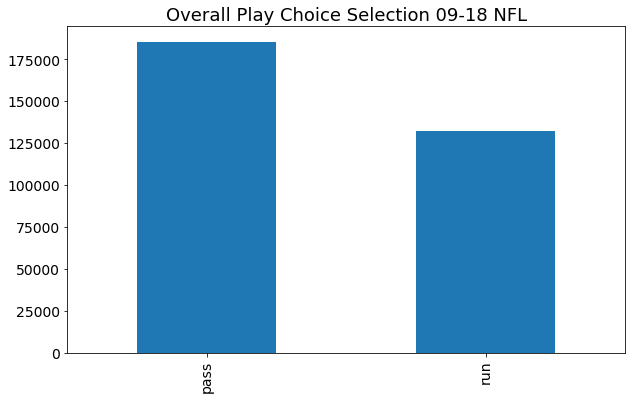

In [211]:
fig1=df_play_choice['play_type'].value_counts().plot(kind='bar', figsize = (10,6), fontsize=14)
plt.title('Overall Play Choice Selection 09-18 NFL', fontsize = 18)

In [212]:
df_plot = df_play_choice.groupby('down')['play_type'].value_counts()

Text(0.5, 1.0, 'Play Selection by Down 09-18 NFL')

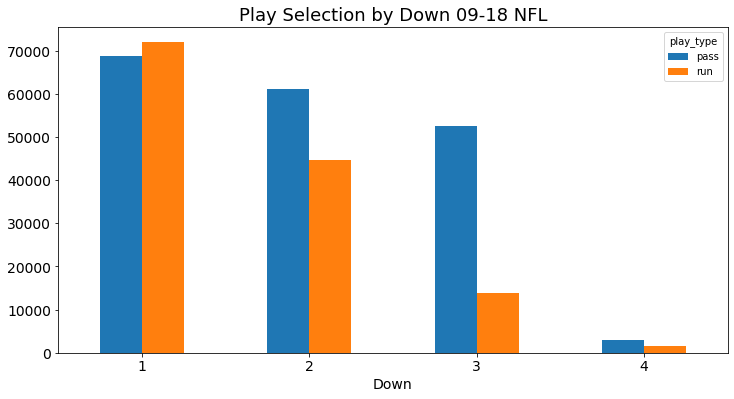

In [213]:
df_plot.unstack(level=-1).plot(kind='bar',figsize=(12,6), fontsize= 14, rot = 0)
plt.xlabel('Down', fontsize=14)
plt.title('Play Selection by Down 09-18 NFL', fontsize = 18)

# create groupings for yards to go

In [241]:
def ydstogo_grouping(row):
    if row['ydstogo'] in range(7,11):
        val = 3
    elif row['ydstogo'] in range(4,7):
        val = 2
    elif row['ydstogo'] in range(1,4):
        val = 1
    elif (row['ydstogo'] > 10) & (row['ydstogo'] < 20):
        val = 4 
    else:
        val = 5
    
    return val

In [242]:
df_play_choice['yds_to_go_grp'] = df_play_choice.apply(ydstogo_grouping, axis=1)

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [243]:
df_play_choice.head()

,game_date,yardline_100,half_seconds_remaining,game_seconds_remaining,down,ydstogo,ydsnet,play_type,yards_gained,posteam,shotgun,score_differential,yds_to_go_grp
1,2009-09-10,58.0,1793.0,3593.0,1,10,5,pass,5.0,PIT,0,0.0,3
2,2009-09-10,53.0,1756.0,3556.0,2,5,2,run,-3.0,PIT,0,0.0,2
3,2009-09-10,56.0,1715.0,3515.0,3,8,2,pass,0.0,PIT,1,0.0,3
5,2009-09-10,98.0,1696.0,3496.0,1,10,0,run,0.0,TEN,0,0.0,3
6,2009-09-10,98.0,1660.0,3460.0,2,10,4,pass,4.0,TEN,0,0.0,3


In [244]:
df_plot_two = df_play_choice.groupby(['down','yds_to_go_grp'])['play_type'].value_counts()

Text(0.5, 1.0, 'Play Selection by Down & Yards to Go 09-18 NFL')

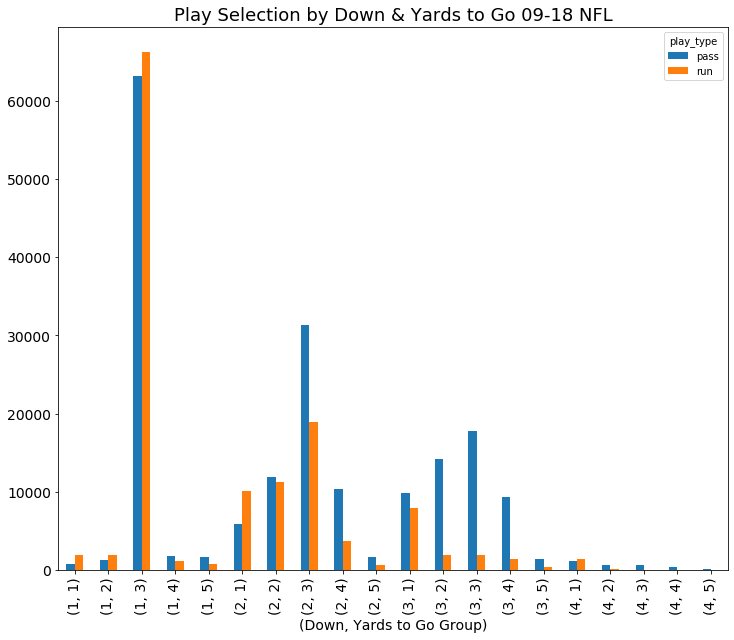

In [245]:
df_plot_two.unstack(level=-1).plot(kind='bar',figsize=(12,10),fontsize= 14, rot = 90)
plt.xlabel('(Down, Yards to Go Group)', fontsize=14)
plt.title('Play Selection by Down & Yards to Go 09-18 NFL', fontsize = 18)

In [246]:
df_team=df_play_choice.groupby(['posteam'])['play_type'].value_counts()

In [247]:
df_team = df_team.unstack(level=-1)

In [248]:
df_team['pass_ratio'] = df_team['pass']/(df_team['pass']+df_team['run'])

In [249]:
df_team.sort_values(by='pass_ratio',ascending=False)

play_type,pass,run,pass_ratio
posteam,,,
DET,6518,3761,0.634108
ARI,6071,3708,0.620820
IND,6216,3870,0.616300
NO,6407,3997,0.615821
ATL,6177,3942,0.610436
GB,6008,3946,0.603576
NYG,5920,3920,0.601626
PIT,5945,3944,0.601173
OAK,5820,3953,0.595518


In [250]:
df_play_choice.groupby('play_type').mean()['yards_gained']

play_type
pass    6.321333
run     4.364193
Name: yards_gained, dtype: float64

In [251]:
test = df_play_choice.loc[(df_play_choice['down']==3)&(df_play_choice['yds_to_go_grp']==2)]

In [252]:
test.groupby('play_type').mean()['yards_gained']

play_type
pass    5.514796
run     5.495752
Name: yards_gained, dtype: float64